# Projet numérique: Equations Différentielles

In [2]:
import autograd
import autograd.numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

from IPython.display import display

#### Question 1
Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre (0,0) et $\bar{x}\in\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$. Que peut-on dire de leur stabilité à ce stade ?

*Réponse:* Pour la 1ère équation: le nombre de proies au cours du temps évolue ainsi: elles se reproduisent, donc leur nombre augmente avec le temps, par un facteur $\alpha$;et une partie de ces proies est éliminée par un partie des prédateurs, d'où le terme $\beta x_1 x_2$ (à améliorer ?).
$\newline$Pour la 2nde équation: un prédateur, en l'absence de sa proie, ne peut survivre: une partie d'entre eux qui n'a pas pu se nourrir des proies disparaît, d'où le terme $-\gamma x_2$. Le reste des prédateurs, qui a pu se nourrir de ses proies, peut survivre et se reproduire: le nombre de prédateurs augmente donc proportionnellement au nombre de proies, d'un facteur $\delta x_1$.

Un point d'équilibre du couple d'équations vérifie $(\dot{x_1},\dot{x_2})= (0,0)$. Seuls les points (0,0) et $\bar{x}=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ vérifient cette condition.

De plus: la fonction $f: x:=(x_1,x_2) \in \mathbb{R}^2 \mapsto (\dot{x_1},\dot{x_2})$ est continûment différentiable, et sa matrice jacobienne est égale à $J_{f}((x_1,x_2))=\begin{pmatrix}\alpha-\beta x_2 &-\beta x_1\\ \delta x_2&\delta x_1 -\gamma\\ \end{pmatrix}$

En (0,0), elle vaut $J_{f}((0,0))=\begin{pmatrix}\alpha &0\\ 0&\ -\gamma\\ \end{pmatrix}$. Ses valeurs propres sont $\alpha$ et $-\gamma$, or $\alpha >0$ donc d'après le lien entre stabilité et stabilité du linéarisé tangent, **(0,0) est un point d'équilibre instable du système.**

En $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$, elle vaut $J_{f}((\frac{\gamma}{\delta},\frac{\alpha}{\beta}))=\begin{pmatrix}0 &\frac{-\gamma\beta}{\delta}\\ \frac{\alpha\delta}{\beta}&0\\ \end{pmatrix}$. Ses valeurs propres sont imaginaires purs, on ne peut pas utiliser le même critère qu'avec le point (0,0) pour déterminer la stabilité ou non de ce point. Il faut réaliser une analyse plus approfondie pour déterminer sa stabilité ou non. 

#### Question 2
A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser streamplot pour visualiser le portrait de phase.

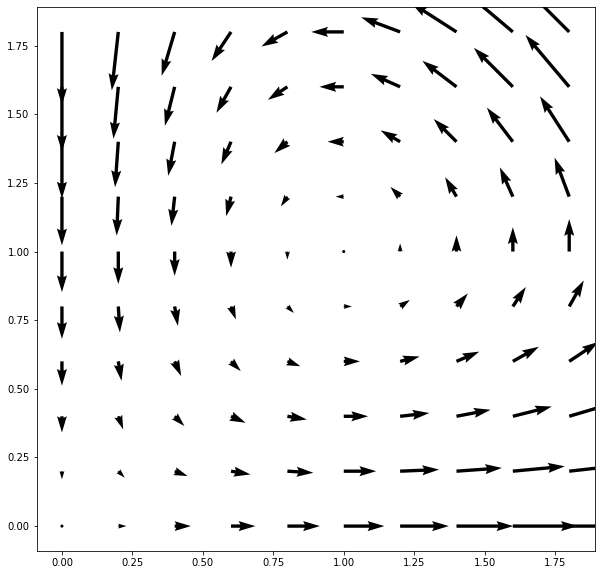

In [18]:
alpha, beta, gamma, delta = 1, 1, 1, 1
x1 = np.arange(0,2,0.2)
x2 = np.arange(0,2,0.2)
X1, X2 = np.meshgrid(x1,x2)
Y1 = X1 * (alpha - beta * X2)
Y2 = -X2 * (gamma - delta * X1)

fig, ax = plt.subplots()
q = ax.quiver(X1, X2, Y1, Y2)
plt.show()

#### Question 3
Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$ reste dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$ sur son ensemble de définition.

*Réponse:*

#### Question 4
On considère la fonction $H(x_1,x_2) =\delta x_1−\gamma lnx_1+\beta x_2−\alpha lnx_2$ définie sur $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$. Calculer la dérivée de H le long des solutions initialisées dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$ est définie sur $\mathbb{R}$.

*Réponse:*

#### Question 5
Représenter les courbes de niveau de H. Où se trouve ̄$\bar{x}$? Qu’en conclut-on sur le comportement des solutions? En déduire (graphiquement) que ̄$\bar{x}$ est stable, au sens de la définition de stabilité.

#### Question 6
Coder une fonction du type $\newline$def solve_euler_explicit(f, x0, dt, t0, tf):$\newline$...$\newline$return t,$\newline$ xprenant en entrée une fonction $f:\mathbb{R}x\mathbb{R}^n \mapsto\mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps dt, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$du schéma d’Euler explicite appliqué à ̇$\dot{x}$=f(t,x). La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque dt tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

#### Question 7
Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka-Volterra. Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction H.

#### Question 8
Coder maintenant une fonction du type $\newline$def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):$\newline$...$\newline$return t,$\newline$ x donnant la solution d’un schéma d’Euler implicite appliqué à ̇$\dot{x}$=f(t,x)selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

#### Question 9
Expliquer pourquoi les solutions de ̇$\newline\dot{x_1}=x_1(\alpha−\beta x_2)−u_1(x_1,x_2)(H(x_1,x_2)−H_0) ̇\newline\dot{x_2}=−x_2(\gamma−\delta x_1)−u_2(x_1,x_2)(H(x_1,x_2)−H_0)$sont identiques à celles de Lotka-Volterra si $H_0=H(x(0))$ pour tout choix de $u:\mathbb{R}^2→\mathbb{R}^2$ continûment différentiable.

*Réponse:*

#### Question 10
Soit $H_0\in\mathbb{R}$. Calculer la dérivée de $H−H_0$ le long des solutions de cenouveau système. Montrer que l’on peut choisir u tel que $\frac{d(H(x(t))−H_0)}{dt} =−k\|\nabla H(x(t))\|^2 (H(x(t))−H_0)$.En déduire qu’alors H(x(t))converge exponentiellement vers $H_0$ lorsque t tend vers l’infini si x reste à une distance strictement positive de ̄$\bar{x}$.

*Réponse:*

#### Question 11
En déduire comment modifier l’implémentation du schéma d’Euler pourassurer la stabilité de H. Quel est le rôle de k? Peut-il être choisi arbitrairement grand? Pourquoi? On pourra exprimer $H(x_j+1)−H(x_0)$ en fonction de $H(x_j)−H(x_0)$ au premier ordre en dt.